In [10]:
import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Define the directory with images
image_dir = "/Users/zafercalisir/Desktop/GradProj/radiaoimaging-disease-detection/datasets/pneuomonie/test"

# Get a dataset of file paths
file_paths = tf.data.Dataset.list_files(image_dir + "/*.jpeg")  # Adjust file extension as needed

# Function to load and preprocess each image
def load_image(file_path):
    # Load image
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Use decode_png if images are in PNG format
    image = tf.image.resize(image, [256, 256])  # Resize to 256x256
    return image, file_path


# Load a few images along with their file paths
image_dataset = file_paths.map(load_image).take(5)



2024-11-03 18:18:28.334012: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


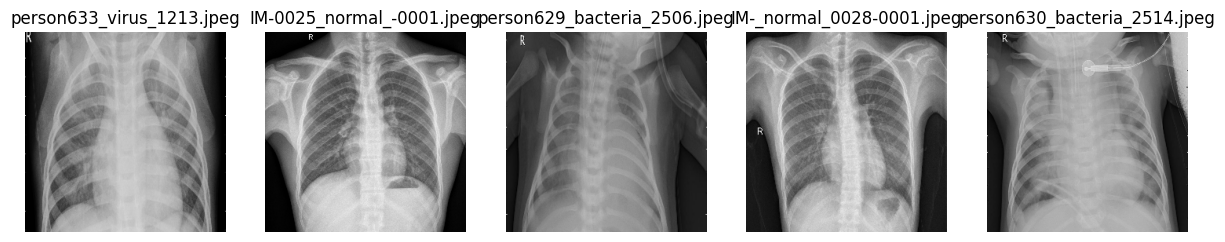

In [22]:
plt.figure(figsize=(15, 10))

for i, (image, file_path) in enumerate(image_dataset):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy().astype("uint8"))  # Convert to uint8 for display
    filename = os.path.basename(file_path.numpy().decode("utf-8"))  # Extract filename from path
    plt.title(filename)  # Use filename as the title
    plt.axis("off")

plt.show()